In [12]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime
# from main import getHourlyGen, getHourlyLoad
from main import getFutureData
from genCo import getGenCos

In [13]:
dfISO = pd.read_csv('data/CELT2023.csv')
dfISO[['Primary Fuel Type', 'GENERATOR TYPE']]

,Primary Fuel Type,GENERATOR TYPE
0,LFG,INTERNAL COMBUSTION
1,NG,COMBINED CYCLE
2,NG,COMBINED CYCLE
3,NG,COMBINED CYCLE
4,NG,COMBINED CYCLE
...,...,...
2580,SUN,PHOTOVOLTAIC
2581,SUN,PHOTOVOLTAIC
2582,SUN,PHOTOVOLTAIC
2583,SUN,PHOTOVOLTAIC


In [ ]:
fuelDict = {'LFG': 'LandFill Gas', 'NG': 'Gas', 'DFO': 'Oil', 'KER': 'Oil',\
            'WDS':'Refuse/Woods', 'BIT':'Coal', 'MSW' : 'Refuse/Woods', \
            'JF':'Oil', 'RFO' : 'Oil',
            'WAT':'Hydro', 'NUC':'Nuclear', 'WND':'Wind', 'SUN':'Solar',\
            'OBG': 'Gas-Other', 'MWH': 'Other'}

In [149]:
# Get Future Load and Data
dfHourlyLoad, dfHourlySolar, dfHourlyWind, dfISO, info = getFutureData(ISO='ISNE', verbose="False", path='data/forecast/' , 
                                                                        load_rate='high', vre_mix='low')
numGenerators, totalCap, adjRatios, cap_rate, LOLE = info[0][0], info[1][0], info[2], info[3][0], info[4][0]

In [150]:
dfISO[dfISO['Fuel Type'] == 'Solar']['Nameplate Capacity (MW)'].sum(), dfISO[dfISO['Fuel Type'] == 'Wind']['Nameplate Capacity (MW)'].sum(), \
dfISO['Nameplate Capacity (MW)'].sum()

(8070.9912769948005, 4597.610483325302, 42228.67253440008)

In [153]:
# Get the GenCos and CSO
genCos =  getGenCos(numGenerators, dfISO)
dfCSO = pd.read_csv('data/CSO2023.csv', skiprows=0, index_col=None)

for gen in genCos: gen.updateCSO(dfCSO, dfISO, cap_rate, adjRatios, 'January');

In [155]:
sum([gen.CapObl for gen in genCos])

26478.517168821574

{'Gas': 15085.73040225703, 'Hydro': 2918.8823065385964, 'Waste': 633.2656836208348, 'Coal': 377.685536293038, 'Oil': 2750.1448259815957, 'Nuclear': 2874.1291573751078, 'Wind': 1725.3618000921915, 'Other': 22.18083344763886, 'Solar': 91.13662321570312}


(0.0, 19000.0)

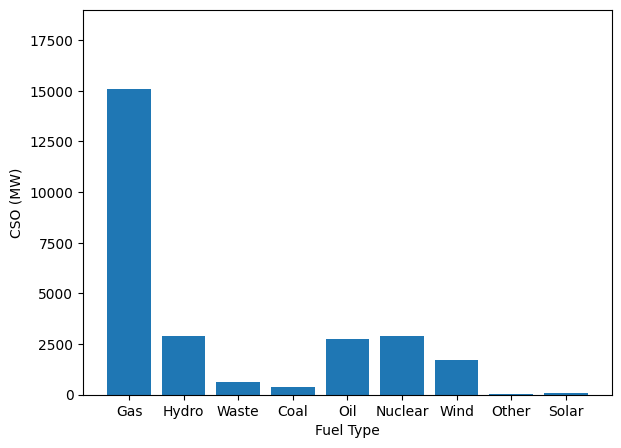

In [154]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
csoHist = {}
for genco in genCos:
    temp = genco.CapObl

    if genco.fuelType in csoHist:
        csoHist[genco.fuelType] += temp
    else:
        csoHist[genco.fuelType] = temp
print(csoHist)

labels = list(csoHist.keys())
weights = list(csoHist.values())

plt.bar(labels, weights)
plt.xlabel('Fuel Type')
plt.ylabel('CSO (MW)');
plt.ylim(0, 19000)

OTHERS

In [3]:
dfHourlyLoad = getHourlyLoad(ISO='ISNE', verbose=False)
dfHourlySolar, dfHourlyWind = getHourlyGen(ISO='ISNE', verbose=False)

NameError: name 'getHourlyLoad' is not defined

In [2]:
load = dfHourlyLoad['Total Load'].loc[:23]
dailyGen = 232803
sum(load), dailyGen, dailyGen - sum(load)

NameError: name 'dfHourlyLoad' is not defined

In [2]:
# df = pd.read_csv('data/genfuelmix_20230101.csv', skiprows=1)
# df.drop('H', inplace=True, axis=1)
# df.drop('Marginal Flag', inplace=True, axis=1)
# df.drop('Fuel Category Rollup', inplace=True, axis=1)
# df.dropna(inplace=True, axis=0)
# feulCategory = df['Fuel Category'].unique()
# feulCategory.sort()
# print(feulCategory)
# dfHourly = pd.DataFrame()
# date = df['Date'].iloc[0]
# j=0
# for i in range(len(df)):
#     if j == i:
#         time = df['Time'].iloc[i]
#         slice = df.loc[np.where(df['Date']==date)].loc[np.where(df['Time']==time)]
#         for fuel in feulCategory:
#             if fuel not in slice['Fuel Category'].values:
#                 entry = {'Date': date, 'Time': time, 'Fuel Category': fuel, 'Gen Mw': 0.0}
#                 slice.loc[len(slice.index)] = entry
#         slice = slice.sort_values('Fuel Category')
#         if dfHourly.empty:
#             dfHourly = slice
#         else:
#             dfHourly = pd.concat([dfHourly, slice], axis=0)
#         dfHourly.reset_index(drop=True, inplace=True)
        
#         print(df.loc[np.where(df['Date']==date)].loc[np.where(df['Time']==time)].index, time)
#         j = df.loc[np.where(df['Date']==date)].loc[np.where(df['Time']==time)].index[-1] + 1
#         print(j)


# dfHourly
# dfHourly.to_csv('data/genfuelmix_20230101_hourly_FIXED.csv', index=False)
    

In [3]:
# df = pd.read_csv('data/genfuelmix_20230101_hourly_FIXED.csv', skiprows=0)
# feulCategory = df['Fuel Category'].unique()


# # for i in range(len(df) // len(feulCategory)):
# #     slice = df.loc[i*len(feulCategory):(i+1)*len(feulCategory)-1]
# #     time = slice['Time'].iloc[0]
# #     hour, minute, second = map(int, time.split(':'))
# #     time = datetime(year, month, day, hour, minute, second)
# #     print(hour)
# #     print(slice)
# #     break

# for fuelType in feulCategory:
#     slice = df.loc[np.where(df['Fuel Category']==fuelType)]
#     hourlyGen = np.zeros(24)
#     oldTime = datetime(1, 1, 1, 0, 0, 0)
#     for i in range(len(slice)):
#         time = slice['Time'].iloc[i]
#         hour, minute, second = map(int, time.split(':'))
#         currentTime = datetime(1, 1, 1, hour, minute, second)
#         print(currentTime, oldTime)
#         delta = (currentTime - oldTime).seconds / 3600
#         # print(delta)
#         hourlyGen[hour] = slice['Gen Mw'].iloc[i] * delta
        
#         oldTime = currentTime
#     print(hourlyGen)
#     break

EIA Data for Generators

In [5]:
df = pd.read_excel('data/DailyGen2023.xlsx', skiprows=0, index_col=None, sheet_name='DAYGENBYFUEL')
# df.columns = df.iloc[0]
# df = df[1:]
df.index.stop

365

In [6]:
df = pd.read_excel('data/november_generator2023.xlsx', skiprows=0, index_col=0)
df = df[1:]
df.columns = df.iloc[0]
df = df[1:]
df_ISNE = df.loc[df['Balancing Authority Code'] == 'ISNE']

In [7]:
numGenerators = len(df_ISNE.index)
totalCap = sum(df_ISNE['Nameplate Capacity (MW)'].to_list())
totalCSO = 28660.0 #MWs from ISO-NE website
print('Total Capacity: ', totalCap, ', CSO: ', totalCSO, ', of CSO% : ', totalCSO/totalCap*100)

Total Capacity:  38183.99999999998 , CSO:  28660.0 , of CSO% :  75.05761575529021


In [13]:
len(df_ISNE[df_ISNE['Energy Source Code'] == 'WND']), len(df_ISNE[df_ISNE['Energy Source Code'] == 'SUN'])

(84, 746)

In [21]:
df_ISNE

Entity ID,Entity Name,Plant ID,Plant Name,Google Map,Bing Map,Plant State,County,Balancing Authority Code,Sector,Generator ID,...,Nameplate Energy Capacity (MWh),DC Net Capacity (MW),Planned Derate Year,Planned Derate Month,Planned Derate of Summer Capacity (MW),Planned Uprate Year,Planned Uprate Month,Planned Uprate of Summer Capacity (MW),Latitude,Longitude
Inventory of Operating Generators as of November 2023,,,,,,,,,,,,,,,,,,,,,
54895,FirstLight Power Resources Services LLC,539,Rocky River (CT),Map,Map,CT,Litchfield,ISNE,IPP Non-CHP,1,...,,,,,,,,,41.5826,-73.4349
54895,FirstLight Power Resources Services LLC,539,Rocky River (CT),Map,Map,CT,Litchfield,ISNE,IPP Non-CHP,2,...,,,,,,,,,41.5826,-73.4349
54895,FirstLight Power Resources Services LLC,539,Rocky River (CT),Map,Map,CT,Litchfield,ISNE,IPP Non-CHP,3,...,,,,,,,,,41.5826,-73.4349
22379,Connecticut Jet Power LLC,540,Branford,Map,Map,CT,New Haven,ISNE,IPP Non-CHP,UN10,...,,,,,,,,,41.2925,-72.7942
54895,FirstLight Power Resources Services LLC,541,Bulls Bridge,Map,Map,CT,Litchfield,ISNE,IPP Non-CHP,1,...,,,,,,,,,41.659046,-73.49198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65785,"Luminace Sunbeam Development Holdings, LLC",66876,Cenergy - Waterville,Map,Map,ME,Kennebec,ISNE,IPP Non-CHP,WAT,...,,,,,,,,,44.538719,-69.66888
65785,"Luminace Sunbeam Development Holdings, LLC",66878,Cenergy - Wiscasset,Map,Map,ME,Lincoln,ISNE,IPP Non-CHP,WIS,...,,,,,,,,,43.964548,-69.70476
65043,Madison Energy Investments LLC,66907,Barefoot Solar,Map,Map,ME,Somerset,ISNE,IPP Non-CHP,BARE1,...,,5.5,,,,,,,44.595751,-69.60503


In [20]:
sum(df_ISNE[df_ISNE['Energy Source Code'] == 'WND']['Nameplate Capacity (MW)'].to_list()), \
    sum(df_ISNE[df_ISNE['Energy Source Code'] == 'SUN']['Nameplate Capacity (MW)'].to_list()), \
        sum(df_ISNE['Nameplate Capacity (MW)'].to_list())

(1540.2, 2455.7000000000003, 38183.99999999998)

In [8]:
feulDict = {'BIT':'Coal', 'NG':'Gas', 'WAT':'Hydro', 'NUC':'Nuclear', \
        'DFO':'Oil', 'RFO':'Oil', 'JF':'Oil', 'KER':'Oil', \
        'MSW':'Waste', 'SUN':'Solar', 'WND':'Wind', 'WDS':'Wood'}
fuels = df_ISNE['Energy Source Code'].map(feulDict)
df_ISNE.inser(-1, 'Fuel', fuels)

AttributeError: 'DataFrame' object has no attribute 'inser'

In [4]:
isVRE = ['SUN', 'MWH', 'OBG', 'WND', 'BLQ']
isNotVRE = ['KER', 'NG', 'DFO', 'RFO', 'JF', 'WDS', 'BIT', 'WOO' , 'NUC', 'MSW', 'WAT']
df_ISNE['isVRE'] = np.where(df_ISNE['Energy Source Code'].isin(isVRE), 1, 0)

/tmp/ipykernel_27817/2647040716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ISNE['isVRE'] = np.where(df_ISNE['Energy Source Code'].isin(isVRE), 1, 0)


- Add FOR based on GADS

PFP

In [5]:
class GenCo:
    def __init__(self, MaxCap, CapObl, isVRE=False, FOR=0.1):
        self.MaxCap = MaxCap
        self.CapObl = CapObl
        self.isVRE = isVRE
        self.FOR = FOR
        self.deficit = False

    def currentCap(self, weatherCoef=1):
        self.availableCap = self.MaxCap * weatherCoef * np.random.choice(2, 1, p=[self.FOR, 1-self.FOR])
        if self.availableCap < self.CapObl:
            self.deficit = True
        # if self.isVRE:
        #     print('VRE: ', self.availableCap, ', ', self.CapObl, ', ', self.deficit)
        #     raise
        self.participateCap = np.minimum(self.availableCap, self.CapObl)

def getGenCos(numGen, df=None):
    genCos = []
    if df is None:
        MaxCaps = np.random.randint(low=5, high=100, size=(numGen)) * 1000
        isVREs = np.random.choice(2, 1, size=(numGen))
    else:
        MaxCaps = df['Nameplate Capacity (MW)'].to_list() * 1000
        isVREs = df['isVRE'].to_list()

    derateCnt = {0: 1.00, 
                1: 0.20}
    deratedCap = [MaxCaps[i] * derateCnt[isVREs[i]] for i in range(numGen)]
    totalDeratedCap = sum(deratedCap)
    obligations = deratedCap * np.array(totalCSO)/np.array(totalDeratedCap)
    # print('Total derated capacity: ', totalDeratedCap, ', Total obligations: ', sum(obligations))

    for i in range(numGen):
        MaxCap = MaxCaps[i]
        isVRE = isVREs[i]
        obligation = obligations[i]
        if isVRE:
            FOR = np.min([1, np.max([0, np.random.exponential(0.05)])])
        else:
            FOR = np.min([1, np.max([0, np.random.exponential(0.10)])])
        
        genCos.append(GenCo(MaxCap, obligation, isVRE, FOR))
    return np.array(genCos)


class Market:
    def __init__(self, numGen):
        self.numGen = numGen

    def getCurrentCap(self, genCos):
        currentCapSum = 0.
        for gen in genCos:
            weatherCoef = 1.
            if gen.isVRE:
                weatherCoef = np.random.uniform(0.8, 1)
            gen.currentCap(weatherCoef)
            currentCapSum += gen.participateCap
        return currentCapSum

    def getObligations(self, genCos):
        obligationsSum = 0
        for gen in genCos:
            obligationsSum += gen.CapObl
        return obligationsSum
    
    def sortGenCos(self, genCos):
        # np.random.shuffle(genCos)
        return genCos


class PFP:
    def __init__(self, gencos=[], PRR=3.5, BPR=5.0):
        self.genCos = gencos
        #PRR is 3.5 K$ / MWh
        self.PRR = PRR
        # BPR is 5 K$/MW-month
        self.BPR = BPR

    def calcPFP(self, balancingRatio=1.0):
        perfScores = []
        for genCo in self.genCos:
            perfScores.append(genCo.participateCap - balancingRatio * genCo.CapObl)
        perfScores = np.array(perfScores)
        return perfScores * self.PRR

In [6]:
def test(numGen=100, genCos=[], verbose=False):
    market = Market(numGen)
    currentCapSum = market.getCurrentCap(genCos)
    obligationsSum = market.getObligations(genCos)
    if verbose:
        print('currentCapSum: ', currentCapSum, ', obligationsSum: ', obligationsSum)
    if currentCapSum < obligationsSum:
        genCos = market.sortGenCos(genCos)
        for gen in genCos:
            if not gen.deficit:
                tmp = np.minimum(obligationsSum - currentCapSum, gen.availableCap - gen.participateCap)
                currentCapSum +=  tmp
                gen.participateCap += tmp
            if np.allclose(currentCapSum, obligationsSum):
                break
        if not np.allclose(currentCapSum, obligationsSum):
            print('Outage!')
            return None
        pfp = PFP(genCos)
        payments = pfp.calcPFP()
        
    payments = np.array(payments)
    return payments


In [7]:
numGen = numGenerators
genCos = getGenCos(numGen, df_ISNE)
payments = []
while True:
    for gen in genCos:
        gen.deficit = False
    pay = test(numGen, genCos)
    if pay is not None:
        payments.append(pay)
        if len(payments) == 356 * 24:
            break
payments = np.array(payments)
payments = payments.reshape(payments.shape[0], -1)

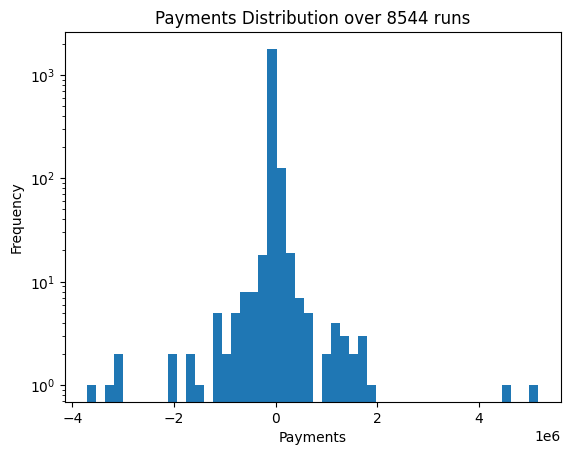

In [8]:
plt.hist(payments.sum(axis=0), bins=50)
plt.xlabel('Payments')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Payments Distribution over {} runs'.format(len(payments)))
plt.show()

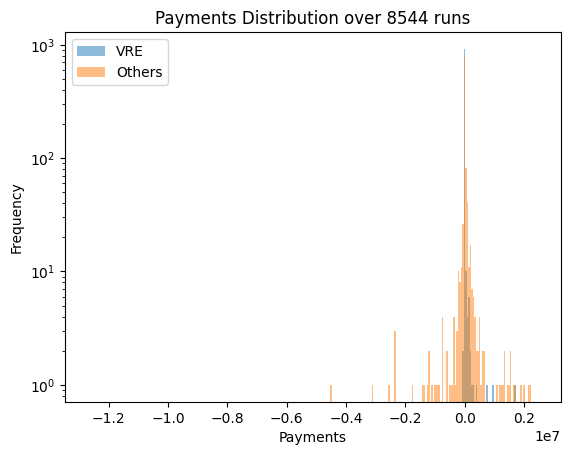

In [27]:
bins=np.arange(payments.sum(0).min(), payments.sum(0).max(), 50000)
VREslice, nonVREslice = [], []
for i in range(numGen):
    if genCos[i].isVRE:
        VREslice.append(i)
    else:
        nonVREslice.append(i)
plt.hist(payments[:, VREslice].sum(axis=0), bins=bins, alpha=0.5, label='VRE')
plt.hist(payments[:, nonVREslice].sum(axis=0), bins=bins, alpha=0.5, label='Others')
plt.xlabel('Payments')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Payments Distribution over {} runs'.format(len(payments)))
plt.legend()
plt.show()

In [28]:
payments[:, VREslice].sum(), payments[:, nonVREslice].sum()

(5901182.25787475, -5901415.039388371)

In [8]:
ISO = 'ISNE'
fuelDict = {'BIT':'Coal', 'NG':'Gas', 'WAT':'Hydro', 'NUC':'Nuclear', \
                'DFO':'Oil', 'RFO':'Oil', 'JF':'Oil', 'KER':'Oil', \
                'MSW':'Waste', 'SUN':'Solar', 'WND':'Wind', 'WDS':'Wood'}

In [9]:
df = pd.read_excel('data/november_generator2023.xlsx', skiprows=0, index_col=0)
df = df[1:]
df.columns = df.iloc[0]
df = df[1:]
dfISO = df.loc[df['Balancing Authority Code'] == ISO]

numGenerators = len(dfISO.index)
totalCap = sum(dfISO['Nameplate Capacity (MW)'].to_list())
totalCSO = 28660.0 #MWs from ISO-NE website

fuels = dfISO['Energy Source Code'].map(fuelDict)
fuels = fuels.fillna('Other')
dfISO.insert(3, 'Fuel Type', fuels)
print('Total Capacity: ', totalCap, ', CSO: ', totalCSO, ', of CSO% : ', totalCSO/totalCap*100)

Total Capacity:  38183.99999999998 , CSO:  28660.0 , of CSO% :  75.05761575529021


In [11]:
# dfISO.to_csv('data/ISNEGEN23.csv', index=False)